In [1]:
import pandas as pd
#list of useful imports that  I will use
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
import random
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [2]:
data = pd.read_csv(r'C:\Users\dondh\Music\CODING\parkinsons.csv')

In [3]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
data.isnull().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

In [9]:
data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [10]:
data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

Text(0.5, 0, 'Class')

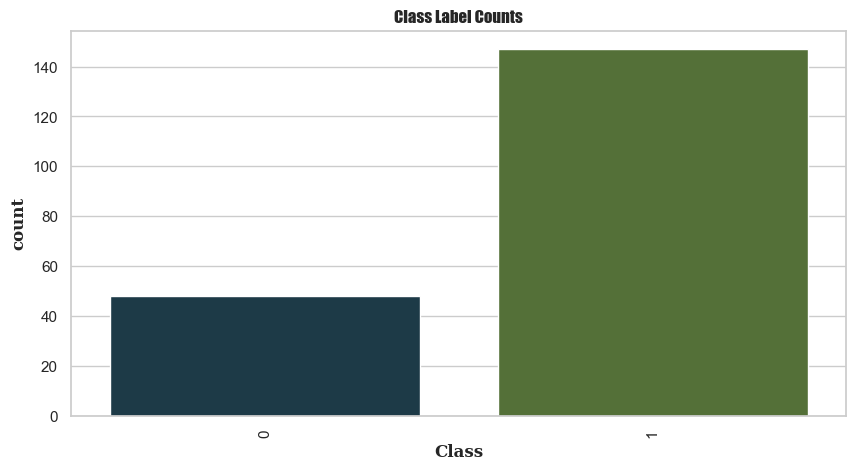

In [11]:
#counts of top 10 drugs
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="status", data=data, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class", {"fontname": "serif", "fontweight":"bold"}) 

C:\Users\dondh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


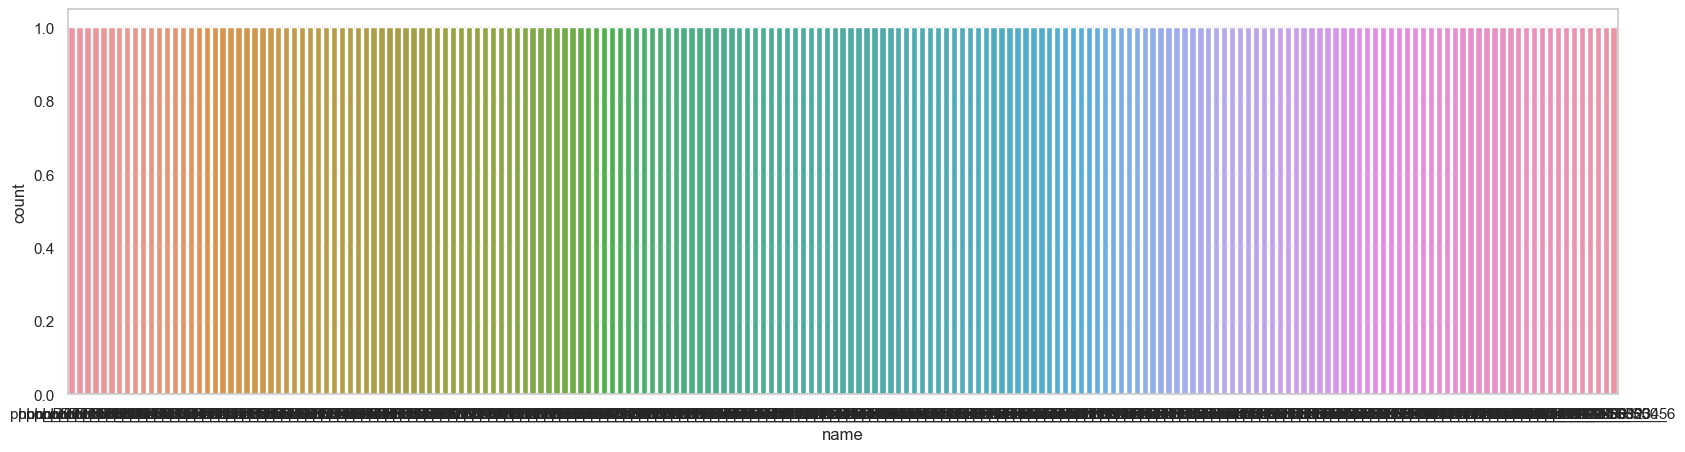

In [12]:
  # Creating plot 
fig = plt.figure(figsize =(20, 5)) 
sns.countplot(data['name']) 
  
# show plot 
plt.show()

In [13]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = data[data['status']== 1]
df_minority = data[data['status']== 0]
 
# Downsample majority class and upsample the minority class
df_minority_upsampled = resample(df_minority, replace=True,n_samples=1000,random_state=100) 
df_majority_downsampled = resample(df_majority, replace=True,n_samples=1000,random_state=100) 
 
# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_minority_upsampled, df_majority_downsampled])
 
# Display new class counts
df_balanced['status'].value_counts()

0    1000
1    1000
Name: status, dtype: int64

C:\Users\dondh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


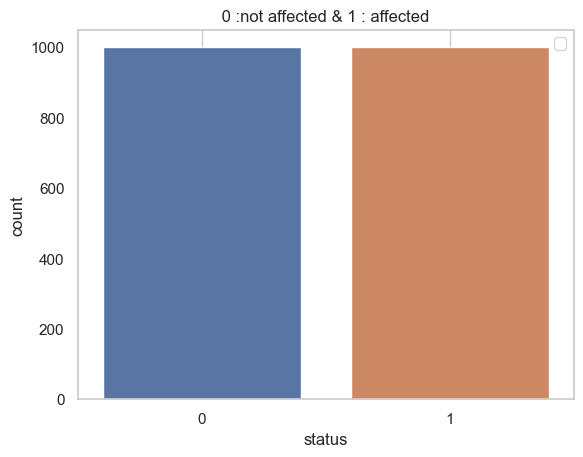

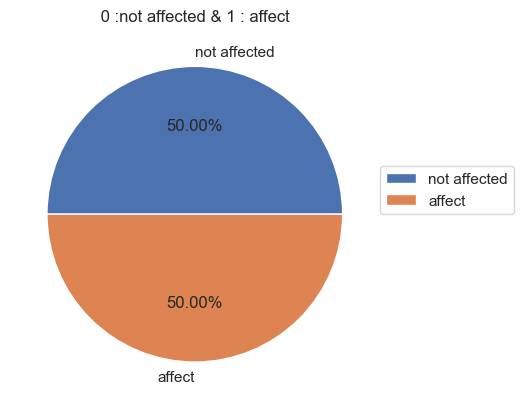

In [14]:
sns.countplot(df_balanced['status'])
plt.grid()
plt.legend()
plt.title(' 0 :not affected & 1 : affected ')
plt.show()
print(' ')
plt.pie([1000,1000],labels=['not affected','affect'],autopct='%.2f%%')
plt.legend(loc=(1,0.5))
plt.title(' 0 :not affected & 1 : affect ')
plt.show()

In [15]:
# shuffle the DataFrame rows 
data= df_balanced.sample(frac = 1)

In [16]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
32,phon_R01_S07_3,198.383,215.203,193.104,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,...,0.01919,0.00119,30.775,0,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
177,phon_R01_S44_1,151.737,190.204,129.859,0.00314,0.000020,0.00135,0.00162,0.00406,0.01469,...,0.02184,0.00570,24.151,1,0.396610,0.745957,-6.486822,0.197919,2.449763,0.132703
87,phon_R01_S21_4,176.281,227.381,125.610,0.00520,0.000030,0.00287,0.00312,0.00862,0.06511,...,0.11012,0.04824,13.922,1,0.602874,0.740837,-5.515071,0.299549,3.136550,0.220968
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.000030,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569
173,phon_R01_S43_3,113.715,116.443,96.913,0.00349,0.000030,0.00171,0.00203,0.00514,0.01472,...,0.02245,0.00478,26.547,0,0.380253,0.766700,-5.943501,0.192150,1.852542,0.179677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,phon_R01_S07_4,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,...,0.01407,0.00072,32.684,0,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
84,phon_R01_S21_1,176.858,205.560,75.344,0.00747,0.000040,0.00418,0.00420,0.01254,0.04795,...,0.08037,0.05470,13.893,1,0.556494,0.729586,-5.288912,0.343073,3.099301,0.242119
183,phon_R01_S49_1,117.226,123.925,106.656,0.00417,0.000040,0.00186,0.00270,0.00558,0.01909,...,0.02592,0.00955,23.079,0,0.603515,0.669565,-5.619070,0.191576,2.027228,0.215724
124,phon_R01_S31_3,156.239,195.107,79.820,0.00694,0.000040,0.00403,0.00395,0.01209,0.02343,...,0.03867,0.02020,19.196,1,0.618663,0.728421,-5.944191,0.143359,1.929715,0.181988


In [17]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [18]:
data.dropna(inplace=True)

In [19]:
data.drop('name',axis=1,inplace=True)

In [20]:
data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
32,198.383,215.203,193.104,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,0.111,...,0.01919,0.00119,30.775,0,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
177,151.737,190.204,129.859,0.00314,0.000020,0.00135,0.00162,0.00406,0.01469,0.132,...,0.02184,0.00570,24.151,1,0.396610,0.745957,-6.486822,0.197919,2.449763,0.132703
87,176.281,227.381,125.610,0.00520,0.000030,0.00287,0.00312,0.00862,0.06511,0.580,...,0.11012,0.04824,13.922,1,0.602874,0.740837,-5.515071,0.299549,3.136550,0.220968
194,214.289,260.277,77.973,0.00567,0.000030,0.00295,0.00317,0.00885,0.01884,0.190,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569
173,113.715,116.443,96.913,0.00349,0.000030,0.00171,0.00203,0.00514,0.01472,0.133,...,0.02245,0.00478,26.547,0,0.380253,0.766700,-5.943501,0.192150,1.852542,0.179677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,...,0.01407,0.00072,32.684,0,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
84,176.858,205.560,75.344,0.00747,0.000040,0.00418,0.00420,0.01254,0.04795,0.435,...,0.08037,0.05470,13.893,1,0.556494,0.729586,-5.288912,0.343073,3.099301,0.242119
183,117.226,123.925,106.656,0.00417,0.000040,0.00186,0.00270,0.00558,0.01909,0.171,...,0.02592,0.00955,23.079,0,0.603515,0.669565,-5.619070,0.191576,2.027228,0.215724
124,156.239,195.107,79.820,0.00694,0.000040,0.00403,0.00395,0.01209,0.02343,0.224,...,0.03867,0.02020,19.196,1,0.618663,0.728421,-5.944191,0.143359,1.929715,0.181988


In [21]:
#  get the all features except "status"
x = data.loc[:, data.columns != 'status']


In [22]:
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
32,198.383,215.203,193.104,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,0.111,...,0.00951,0.01919,0.00119,30.775,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
177,151.737,190.204,129.859,0.00314,0.000020,0.00135,0.00162,0.00406,0.01469,0.132,...,0.01230,0.02184,0.00570,24.151,0.396610,0.745957,-6.486822,0.197919,2.449763,0.132703
87,176.281,227.381,125.610,0.00520,0.000030,0.00287,0.00312,0.00862,0.06511,0.580,...,0.04683,0.11012,0.04824,13.922,0.602874,0.740837,-5.515071,0.299549,3.136550,0.220968
194,214.289,260.277,77.973,0.00567,0.000030,0.00295,0.00317,0.00885,0.01884,0.190,...,0.01373,0.03078,0.04398,21.209,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569
173,113.715,116.443,96.913,0.00349,0.000030,0.00171,0.00203,0.00514,0.01472,0.133,...,0.01148,0.02245,0.00478,26.547,0.380253,0.766700,-5.943501,0.192150,1.852542,0.179677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,...,0.00719,0.01407,0.00072,32.684,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
84,176.858,205.560,75.344,0.00747,0.000040,0.00418,0.00420,0.01254,0.04795,0.435,...,0.03510,0.08037,0.05470,13.893,0.556494,0.729586,-5.288912,0.343073,3.099301,0.242119
183,117.226,123.925,106.656,0.00417,0.000040,0.00186,0.00270,0.00558,0.01909,0.171,...,0.01949,0.02592,0.00955,23.079,0.603515,0.669565,-5.619070,0.191576,2.027228,0.215724
124,156.239,195.107,79.820,0.00694,0.000040,0.00403,0.00395,0.01209,0.02343,0.224,...,0.01720,0.03867,0.02020,19.196,0.618663,0.728421,-5.944191,0.143359,1.929715,0.181988


In [23]:
y = data.iloc[:,-7]

In [24]:
y

32     0
177    1
87     1
194    0
173    0
      ..
33     0
84     1
183    0
124    1
191    0
Name: status, Length: 2000, dtype: int64

In [25]:
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
32,198.383,215.203,193.104,0.00212,0.00001,0.00113,0.00135,0.00339,0.01263,0.111,...,0.00951,0.01919,0.00119,30.775,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
177,151.737,190.204,129.859,0.00314,0.00002,0.00135,0.00162,0.00406,0.01469,0.132,...,0.01230,0.02184,0.00570,24.151,0.396610,0.745957,-6.486822,0.197919,2.449763,0.132703
87,176.281,227.381,125.610,0.00520,0.00003,0.00287,0.00312,0.00862,0.06511,0.580,...,0.04683,0.11012,0.04824,13.922,0.602874,0.740837,-5.515071,0.299549,3.136550,0.220968
194,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,...,0.01373,0.03078,0.04398,21.209,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569
173,113.715,116.443,96.913,0.00349,0.00003,0.00171,0.00203,0.00514,0.01472,0.133,...,0.01148,0.02245,0.00478,26.547,0.380253,0.766700,-5.943501,0.192150,1.852542,0.179677


In [26]:
y.tail()

33     0
84     1
183    0
124    1
191    0
Name: status, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,stratify=y ,random_state=40)

In [28]:
x_train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
27,146.845,208.701,81.737,0.00496,0.00003,0.00250,0.00275,0.00749,0.01919,0.198,...,0.01826,0.02650,0.01328,25.119,0.358773,0.726652,-6.271690,0.196102,2.314209,0.162999
65,228.969,239.541,113.201,0.00238,0.00001,0.00136,0.00140,0.00408,0.01745,0.154,...,0.01234,0.02827,0.00420,24.547,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546
183,117.226,123.925,106.656,0.00417,0.00004,0.00186,0.00270,0.00558,0.01909,0.171,...,0.01949,0.02592,0.00955,23.079,0.603515,0.669565,-5.619070,0.191576,2.027228,0.215724
49,122.964,130.049,114.676,0.00428,0.00003,0.00124,0.00155,0.00373,0.01681,0.154,...,0.01400,0.02789,0.00462,24.971,0.538688,0.754073,-6.482096,0.264967,2.054419,0.128872
165,236.200,244.663,102.137,0.00277,0.00001,0.00154,0.00153,0.00462,0.02448,0.217,...,0.01621,0.04231,0.00620,24.078,0.469928,0.628232,-6.816086,0.172270,2.235197,0.119652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,198.383,215.203,193.104,0.00212,0.00001,0.00113,0.00135,0.00339,0.01263,0.111,...,0.00951,0.01919,0.00119,30.775,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
167,260.105,264.919,237.303,0.00339,0.00001,0.00205,0.00186,0.00616,0.02030,0.197,...,0.01367,0.03557,0.00910,21.083,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587
185,116.286,177.291,96.983,0.00314,0.00003,0.00134,0.00192,0.00403,0.01564,0.136,...,0.01691,0.02001,0.00737,24.199,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
175,115.380,123.109,108.634,0.00332,0.00003,0.00160,0.00199,0.00480,0.01503,0.137,...,0.01133,0.02436,0.00401,26.005,0.405991,0.761255,-5.966779,0.197938,1.974857,0.184067


In [29]:
y_test

193    0
58     1
11     1
126    1
124    1
      ..
43     0
49     0
193    0
64     0
167    0
Name: status, Length: 600, dtype: int64

In [30]:
x_test.to_csv('Parkinsons_test.csv',index = False)

## SUPPORT VECTOR MACHINE

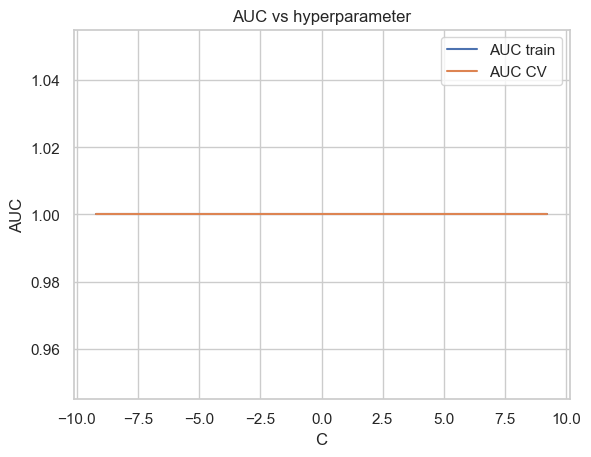

optimal C for which auc is maximum :  10000


In [31]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
import math
from sklearn.metrics import accuracy_score

C = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]

train_auc = []
cv_auc = []

for i in C:
    model = SVC(C=i,gamma=50) 
    clf = CalibratedClassifierCV(model, cv=3)
    clf.fit(x_train,y_train)
    prob_cv = clf.predict(x_test)
    cv_auc.append(accuracy_score(y_test,prob_cv))
    prob_train = clf.predict(x_train)
    train_auc.append(accuracy_score(y_train,prob_train))
optimal_C= C[cv_auc.index(max(cv_auc))]
C=[math.log(x) for x in C]

#plot auc vs alpha
x = plt.subplot( )
x.plot(C, train_auc, label='AUC train')
x.plot(C, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('C')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal C for which auc is maximum : ',optimal_C)

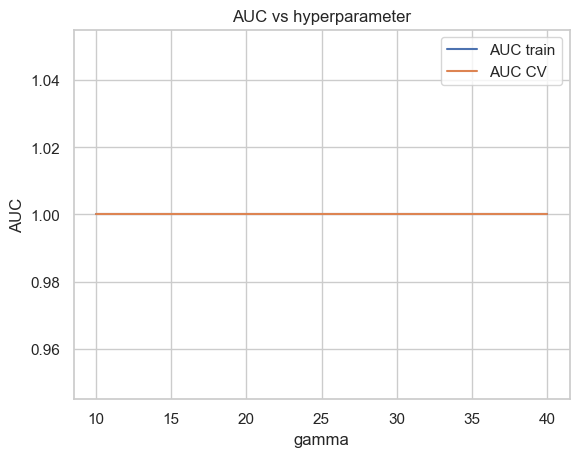

optimal gamma for which auc is maximum :  10


In [32]:
gamma = [10,20,30,30,40]

train_auc = []
cv_auc = []

for i in gamma:
    model = SVC(C=1000,gamma=i) 
    clf = CalibratedClassifierCV(model, cv=3)
    clf.fit(x_train,y_train)
    prob_cv = clf.predict(x_test)
    cv_auc.append(accuracy_score(y_test,prob_cv))
    prob_train = clf.predict(x_train)
    train_auc.append(accuracy_score(y_train,prob_train))
optimal_gamma= gamma[cv_auc.index(max(cv_auc))]
# C=[math.log(x) for x in C]

#plot auc vs alpha
x = plt.subplot( )
x.plot(gamma, train_auc, label='AUC train')
x.plot(gamma, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('gamma')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal gamma for which auc is maximum : ',optimal_gamma)

***********************************
the accuracy on testing data 1.0
the accuracy on training data 1.0
***********************************


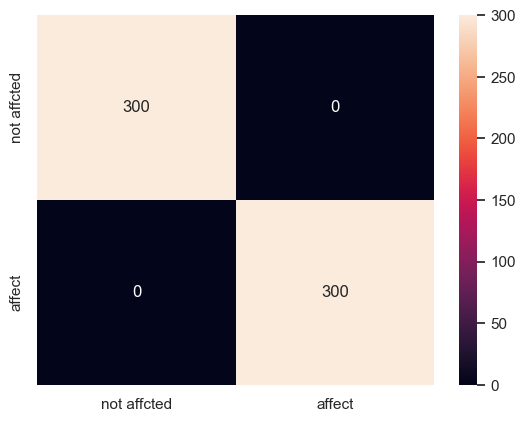

In [33]:
#Testing AUC on Test data
svc = SVC(C=optimal_C,gamma=optimal_gamma)

svc.fit(x_train,y_train)
#predict on test data and train data
 
y_predtests = svc.predict(x_test)
y_predtrains = svc.predict(x_train)

print('*'*35)

#accuracy on training and testing data

print('the accuracy on testing data',accuracy_score(y_test,y_predtests))
print('the accuracy on training data',accuracy_score(y_train,y_predtrains))
train = accuracy_score(y_train,y_predtrains)
test = accuracy_score(y_test,y_predtests)

print('*'*35)


# Code for drawing seaborn heatmaps
class_names = ['not affcted','affect']
cm = pd.DataFrame(confusion_matrix(y_test, y_predtests.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(cm, annot=True, fmt="d")

In [34]:
original =  ['affected' if x==1 else 'not affected' for x in y_test[:20]]
predicted = svc.predict(x_test[:20])
pred = []

for i in predicted:
  if i == 1:
    k = 'affected'
    pred.append(k)
  else:
    k = 'not affected'
    pred.append(k)
# Creating a data frame
dfr = pd.DataFrame(list(zip(original, pred,)), 
               columns =['original_Classlabel', 'predicted_classlebel'])
dfr

,original_Classlabel,predicted_classlebel
0,not affected,not affected
1,affected,affected
2,affected,affected
3,affected,affected
4,affected,affected
5,affected,affected
6,not affected,not affected
7,not affected,not affected
8,not affected,not affected
9,affected,affected


In [35]:
all_model_result = pd.DataFrame(columns=[ 'Classifier' , 'Train-Accuracy', 'Test-Accuracy' ])
new = ['SUPPORT VECTOR-Classifier',train, test]
all_model_result.loc[0] = new

In [36]:
import xgboost as xgb

C:\Users\dondh\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [37]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]
xgb = XGBClassifier()

param_grid={'n_estimators':n_estimators , 'max_depth':dept}
# clf = RandomForestClassifier()
model = GridSearchCV(xgb,param_grid,scoring='accuracy',n_jobs=-1,cv=3)
model.fit(x_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)
optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth

[13:35:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
optimal n_estimators 20
optimal max_depth 5


C:\Users\dondh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dondh\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:35:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
***********************************
the accuracy on testing data 1.0
the accuracy on training data 1.0
***********************************


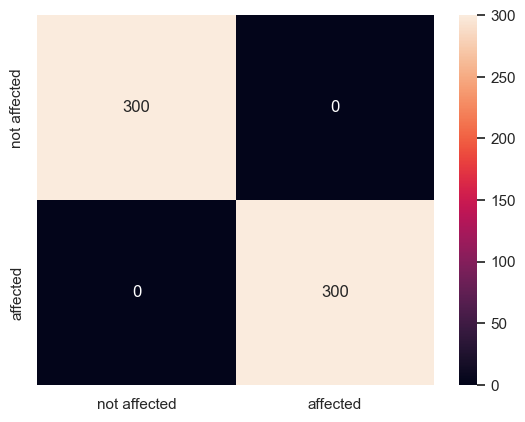

In [39]:
#Testing AUC on Test data


xgb.fit(x_train,y_train)

y_predtest = xgb.predict(x_test)
y_predtrain = xgb.predict(x_train)

print('*'*35)

#accuracy on training and testing data

print('the accuracy on testing data',accuracy_score(y_test,y_predtest))
print('the accuracy on training data',accuracy_score(y_train,y_predtrain))
train2 = accuracy_score(y_train,y_predtrain)
test2 = accuracy_score(y_test,y_predtest)

print('*'*35)


# Code for drawing seaborn heatmaps
class_names =  ['not affected','affected']
cm = pd.DataFrame(confusion_matrix(y_test, y_predtest.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(cm, annot=True, fmt="d")

In [40]:
original =  ['affected' if x==1 else 'not affected' for x in y_test[:20]]
predicted = xgb.predict(x_test[:20])
pred = []

for i in predicted:
  if i == 1:
    k = 'affected'
    pred.append(k)
  else:
    k = 'not affected'
    pred.append(k)
# Creating a data frame
dfr = pd.DataFrame(list(zip(original, pred,)), 
               columns =['original_Classlabel', 'predicted_classlebel'])
dfr

,original_Classlabel,predicted_classlebel
0,not affected,not affected
1,affected,affected
2,affected,affected
3,affected,affected
4,affected,affected
5,affected,affected
6,not affected,not affected
7,not affected,not affected
8,not affected,not affected
9,affected,affected


In [41]:
new = ['XGB-Classifier',train2, test2]
all_model_result.loc[1] = new

In [42]:
all_model_result

,Classifier,Train-Accuracy,Test-Accuracy
0,SUPPORT VECTOR-Classifier,1.0,1.0
1,XGB-Classifier,1.0,1.0
